In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()

# First convolutional layer
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer to transition from convolutional layers to dense layers
model.add(Flatten())

# Fully connected dense layers
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

# Output layer with softmax activation for multiclass classification
model.add(Dense(4, activation='softmax'))  # Replace num_classes with the number of output classes

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy', 'recall', 'AUC'])

# Print model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 16)        │        448 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 16)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 32)        │      4,640 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 64)        │     18,496 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)          │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_4 (Dense)                 │ (None, 256)               │    590,080 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_5 (Dense)                 │ (None, 128)               │     32,896 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_6 (Dense)                 │ (None, 64)                │      8,256 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_7 (Dense)                 │ (None, 4)                 │        260 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 655,076 (2.50 MB)

 Trainable params: 655,076 (2.50 MB)

 Non-trainable params: 0 (0.00 B)

In [2]:
train_dir = './Data/train'
validation_dir = './Data/valid'
test_dir = './Data/test'


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator



# Define image data generators without any data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Define batch size
batch_size = 32

# Generate batches of preprocessed data for training and validation sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)

# Define the number of steps per epoch for training and validation
train_steps_per_epoch = train_generator.samples // batch_size
validation_steps_per_epoch = validation_generator.samples // batch_size

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps_per_epoch,
    epochs=50,  # You can adjust the number of epochs
    validation_data=validation_generator,
    validation_steps=validation_steps_per_epoch
)

# Evaluate the model on test data
test_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_loss, test_accuracy, test_recall, test_auc = model.evaluate(test_generator)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Test Recall:", test_recall)
print("Test AUC:", test_auc)



Found 613 images belonging to 4 classes.


Found 72 images belonging to 4 classes.
Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - AUC: 0.5492 - accuracy: 0.2860 - loss: 1.6091 - recall: 0.0361 - val_AUC: 0.6444 - val_accuracy: 0.4844 - val_loss: 1.2347 - val_recall: 0.1406
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.6898 - accuracy: 0.4062 - loss: 0.6256 - recall: 0.2812 - val_AUC: 0.8177 - val_accuracy: 0.5000 - val_loss: 0.5062 - val_recall: 0.3750
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - AUC: 0.7814 - accuracy: 0.4761 - loss: 1.0937 - recall: 0.1593 - val_AUC: 0.7348 - val_accuracy: 0.3750 - val_loss: 1.0762 - val_recall: 0.1562
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.8459 - accuracy: 0.5938 - loss: 0.5474 - recall: 0.2500 - val_AUC: 0.8542 - val_accuracy: 0.5000 - val_loss: 0.4248 - val_recall: 0.3750
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - AUC: 0.7773 - accuracy: 0.4471 - loss: 1.0233 - recall: 0.2579 - val_AUC: 0.7956 - val_accuracy: 0.5156 - val_loss: 0.94

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load and preprocess the data using ImageDataGenerator
train_dir = './Data/train'
validation_dir = './Data/valid'
test_dir = './Data/test'

# Define image data generators without any data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define batch size
batch_size = 32

# Generate batches of preprocessed data for training, validation, and test sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Function to extract features using a pre-trained CNN
def extract_features(generator, model):
    features = []
    labels = []
    batch_size = generator.batch_size
    num_samples = len(generator.filenames)

    for i in range(num_samples // batch_size):
        batch_data, batch_labels = generator.next()
        features_batch = model.predict(batch_data)
        features.extend(features_batch)
        labels.extend(batch_labels)

    features = np.array(features)
    labels = np.array(labels)
    return features, labels

# Extract features using the pre-trained CNN (the base of your previously defined model)
base_model = Model(inputs=model.input, outputs=model.layers[-5].output)  # Extract features up to the Flatten layer
train_features, train_labels = extract_features(train_generator, base_model)
validation_features, validation_labels = extract_features(validation_generator, base_model)
test_features, test_labels = extract_features(test_generator, base_model)

# Flatten the labels for sklearn classifiers
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(np.argmax(train_labels, axis=1))
validation_labels_encoded = label_encoder.transform(np.argmax(validation_labels, axis=1))
test_labels_encoded = label_encoder.transform(np.argmax(test_labels, axis=1))

# Train SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(train_features, train_labels_encoded)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(train_features, train_labels_encoded)

# Evaluate SVM classifier
svm_train_accuracy = accuracy_score(train_labels_encoded, svm_classifier.predict(train_features))
svm_validation_accuracy = accuracy_score(validation_labels_encoded, svm_classifier.predict(validation_features))
svm_test_accuracy = accuracy_score(test_labels_encoded, svm_classifier.predict(test_features))
svm_test_recall = recall_score(test_labels_encoded, svm_classifier.predict(test_features), average='weighted')

# Evaluate Random Forest classifier
rf_train_accuracy = accuracy_score(train_labels_encoded, rf_classifier.predict(train_features))
rf_validation_accuracy = accuracy_score(validation_labels_encoded, rf_classifier.predict(validation_features))
rf_test_accuracy = accuracy_score(test_labels_encoded, rf_classifier.predict(test_features))
rf_test_recall = recall_score(test_labels_encoded, rf_classifier.predict(test_features), average='weighted')

# Print results
print("SVM Training Accuracy:", svm_train_accuracy)
print("SVM Validation Accuracy:", svm_validation_accuracy)
print("SVM Test Accuracy:", svm_test_accuracy)
print("SVM Test Recall:", svm_test_recall)

print("Random Forest Training Accuracy:", rf_train_accuracy)
print("Random Forest Validation Accuracy:", rf_validation_accuracy)
print("Random Forest Test Accuracy:", rf_test_accuracy)
print("Random Forest Test Recall:", rf_test_recall)

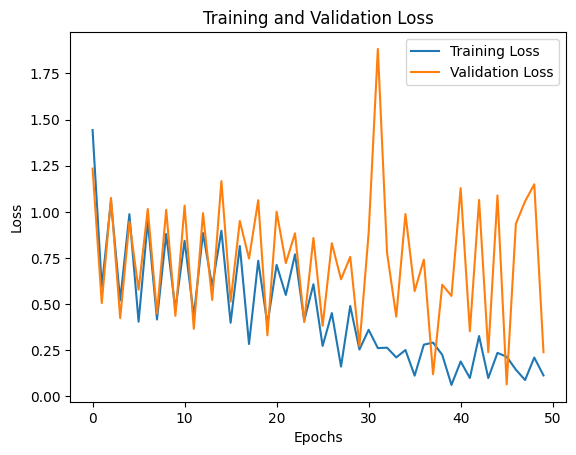

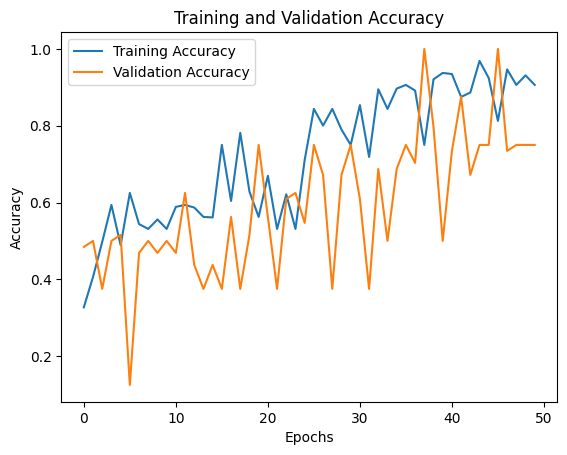

In [14]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step


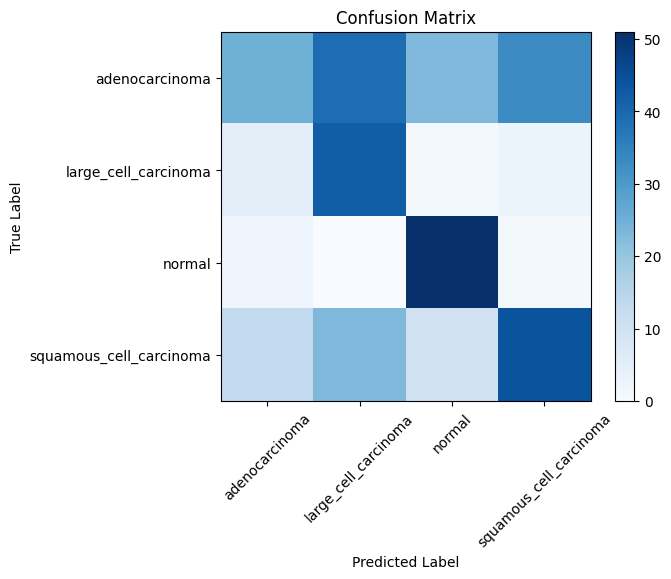

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve


# Plotting confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

test_predictions = model.predict(test_generator)
test_pred_classes = np.argmax(test_predictions, axis=1)
test_true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
plot_confusion_matrix(test_true_classes, test_pred_classes, classes=class_labels)

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Get the true labels for the test set
y_true = test_generator.classes

# Predict the probabilities for each class for the test set
y_pred_prob = model.predict(test_generator)

# Predict the class labels for the test set
y_pred = np.argmax(y_pred_prob, axis=-1)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Calculate precision, recall, and F1-score for each class
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Calculate AUC for multi-class classification using one-vs-rest (OvR) strategy
auc = roc_auc_score(y_true, y_pred_prob, multi_class='ovr')

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC:", auc)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step
Accuracy: 0.5142857142857142
Precision: 0.5350847917514585
Recall: 0.5142857142857142
F1-score: 0.47601280887401737
AUC: 0.8127717107828106


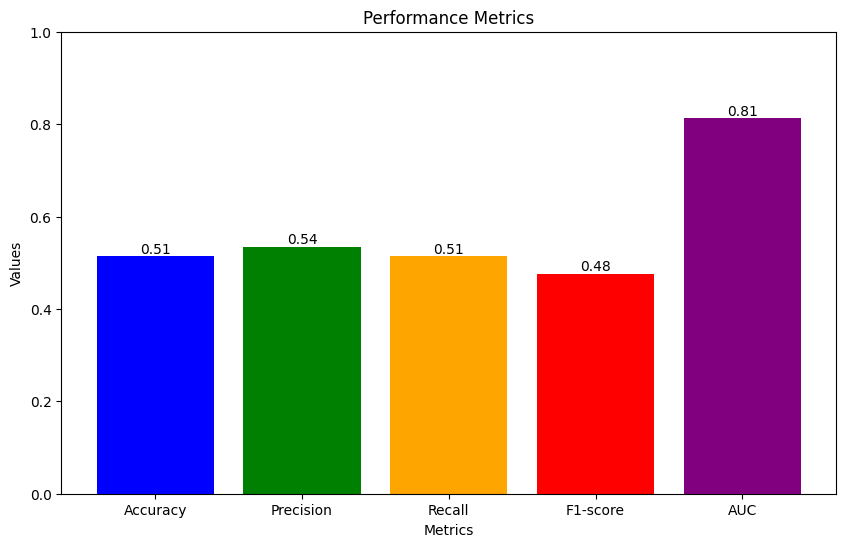

In [35]:
import matplotlib.pyplot as plt

# Define metric names and their corresponding values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC']
values = [accuracy, precision, recall, f1, auc]

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red', 'purple'])

# Add values on each bar
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 2),
             ha='center', va='bottom')

plt.title('Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.ylim(0, 1)  # Set y-axis limit to match the range of metric values (0 to 1)
plt.show()


In [10]:
# Save the model
model.save("lung_cancer_model.h5")


In [21]:
import cv2
import numpy as np

# Load the single image
image_path = './Data/test/squamous_cell_carcinoma/000121.png'
image = cv2.imread(image_path)
image = cv2.resize(image, (64, 64))  # Resize the image to match the input size of the model
image = image / 255.0  # Normalize the pixel values

# Expand dimensions to match the input shape expected by the model
image = np.expand_dims(image, axis=0)

# Predict class probabilities using the trained model
class_probabilities = model.predict(image)

# Get the predicted class label
predicted_class_index = np.argmax(class_probabilities)
class_labels = train_generator.class_indices
predicted_class_label = list(class_labels.keys())[predicted_class_index]

print("Predicted Class:", predicted_class_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted Class: large_cell_carcinoma


In [12]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("lung_cancer_model.h5")

# Load the single image
image_path = './Data/test/squamous_cell_carcinoma/000121.png'
image = cv2.imread(image_path)
image = cv2.resize(image, (64, 64))  # Resize the image to match the input size of the model
image = image / 255.0  # Normalize the pixel values

# Expand dimensions to match the input shape expected by the model
image = np.expand_dims(image, axis=0)

# Predict class probabilities using the trained model
class_probabilities = model.predict(image)

# Get the predicted class label
predicted_class_index = np.argmax(class_probabilities)
class_labels = {'adenocarcinoma': 0, 'large_cell_carcinoma': 1, 'normal': 2, 'squamous_cell_carcinoma': 3}
predicted_class_label = list(class_labels.keys())[predicted_class_index]

print("Predicted Class:", predicted_class_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Predicted Class: large_cell_carcinoma
